In [74]:
# ich wollte es hier mal von unserem Datenset losgelöst auspobieren
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Allows jupyter to display plots inside notebooks
%matplotlib inline

# This will make Jupyter display the plots as vector graphics
%config InlineBackend.figure_format = 'svg'


In [75]:
#Datensatz mit 2 Spalten und ?? Reihen zufällig generieren
n_samples=10
data = np.random.random((n_samples, 2))
print(data)

data.max()

[[0.23806149 0.29960543]
 [0.45874731 0.2700632 ]
 [0.84582459 0.84089338]
 [0.33583683 0.92558785]
 [0.07655317 0.0162312 ]
 [0.96457066 0.9914566 ]
 [0.20279243 0.20271159]
 [0.3061551  0.59719867]
 [0.79369266 0.5287961 ]
 [0.12310329 0.97286441]]


0.9914566010484378

In [76]:
data.shape

(10, 2)

In [77]:
f1=data[0:((n_samples)), 0]

In [78]:
print(f1)

[0.23806149 0.45874731 0.84582459 0.33583683 0.07655317 0.96457066
 0.20279243 0.3061551  0.79369266 0.12310329]


In [79]:
f2=data[0:((n_samples)),1]

In [80]:
print(f2)

[0.29960543 0.2700632  0.84089338 0.92558785 0.0162312  0.9914566
 0.20271159 0.59719867 0.5287961  0.97286441]


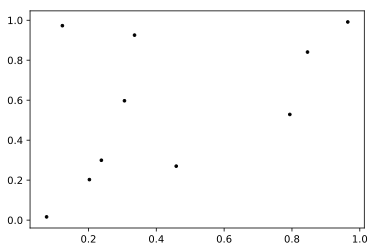

In [81]:
plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

In [82]:
print (X)

[[0.23806149 0.29960543]
 [0.45874731 0.2700632 ]
 [0.84582459 0.84089338]
 [0.33583683 0.92558785]
 [0.07655317 0.0162312 ]
 [0.96457066 0.9914566 ]
 [0.20279243 0.20271159]
 [0.3061551  0.59719867]
 [0.79369266 0.5287961 ]
 [0.12310329 0.97286441]]


In [83]:
# number of clusters
k=4

#initialization, Coordinates of random centroids

#choose some points of the data

xAchsemax= f1.max()
xAchsemin = f1.min()

print(xAchsemax)
print(xAchsemin)

yAchsemax = f2.max()
yAchsemin = f2.min()

print(yAchsemax)
print(yAchsemin)

cx = np.random.randint(((xAchsemin)),((xAchsemax)),size=k)
cy = np.random.randint(((yAchsemin)),((yAchsemax)),size=k)


print(cx)
print(cy)

#Koordinaten der Punkte bestimmen




0.9645706582835468
0.07655317049917976
0.9914566010484378
0.016231202169779024


ValueError: Range cannot be empty (low >= high) unless no samples are taken

In [84]:
# dieser Bereich ist hier leer, da zwischen 0 und 1 keine natürliche Zahl
# könnte man das so für unseren Datensatz verwenden?

In [85]:
# daher zufällige Zahl zwischen 0 und 1 auswählen -> Koordinaten der zufälligen Centroiden

cx1 = np.random.random((k,1))



cy1 = np.random.random((k,1))




C = np.array(list(zip(cx1, cy1)), dtype=np.float32)

print(C)

[[[0.8264404 ]
  [0.26125133]]

 [[0.90223366]
  [0.3427818 ]]

 [[0.11252176]
  [0.9179745 ]]

 [[0.2704406 ]
  [0.842222  ]]]


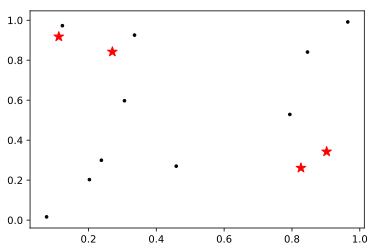

In [86]:
plt.scatter(f1,f2,c='black',s=7)

plt.scatter(cx1,cy1,marker='*',c='red',s=100)

In [87]:
# Distanz Punkte - Centroids berechnen
#dist = (((cx1-f1)**2 + (cy1-f2)**2)*0.5)

In [90]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [93]:
dist(X[1],C)

array([[0.41737617, 0.55644697],
       [0.45839736, 0.63633913],
       [0.57511887, 0.66678956],
       [0.4272145 , 0.5721589 ]])

In [99]:
clusters = np.zeros(len(X))

In [101]:
C_old = np.zeros(C.shape)

In [104]:
error = dist(C, C_old, None)

In [ ]:
from copy import deepcopy

In [ ]:
#while error != 0:
    for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)